In [1]:
import pandas as pd
import scipy.io as io
import numpy as np
import scanpy as scp
import seaborn as sns
import matplotlib.pyplot as plt

from parameters import *

import sys
import os
sys.path.append('../../')
import single_cell_tools.tools as scttools
import single_cell_tools.plot as sctplot

In [2]:
data = pd.DataFrame()
obs = pd.DataFrame()
for file in [i for i in os.listdir(".") if i.endswith(".txt")]:
    d = pd.read_csv(file,sep="\t").transpose()
    data = data.append(d)
    a = pd.DataFrame([file.split("_")[1] for i in range(d.shape[0])])
    a["Type"] = [file.split("_")[2] for i in range(d.shape[0])]
    a["Plate"] = [file.split("_")[-1] for i in range(d.shape[0])]
    obs = obs.append(a)
obs.index = data.index.values
obs.columns = ["Stage", "Type", "Plate"]
data

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,...,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
X4sp_neg_EC75_sc25,0,56,29,7,22,0,9,77,20,115,...,0,0,0,0,37,123,6,3,0,61
X4sp_neg_EC75_sc26,0,0,10,0,0,0,0,6,0,23,...,0,0,0,0,0,0,0,13,0,3
X4sp_neg_EC75_sc27,0,5,63,0,9,0,0,54,29,69,...,0,1,0,0,5,19,0,21,0,69
X4sp_neg_EC75_sc28,2,4,0,0,2,0,4,23,3,4,...,1,2,0,0,7,5,2,18,0,4
X4sp_neg_EC75_sc29,0,3,9,0,1,0,6,66,8,54,...,0,0,1,0,0,16,0,2,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X18sp17_neg_EC33_sc48,0,134,26,0,50,3,3,305,92,185,...,0,10,0,0,14,49,15,61,0,126
X18sp17_neg_EC33_sc49,0,47,62,0,6,0,18,248,22,140,...,22,0,0,0,1,20,16,59,0,125
X18sp17_neg_EC33_sc50,0,190,9,0,1,2,2,615,102,318,...,0,0,0,0,69,70,0,66,0,119
X18sp17_neg_EC33_sc51,0,29,103,0,44,1,10,156,67,370,...,11,19,0,0,12,173,0,126,2,178


In [3]:
adata = scp.AnnData(data.values, obs=obs, var = pd.DataFrame(data.columns,columns=["gene_name"]), layers={"Raw":data.values})

/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


# Preprocessing

In [4]:
mtgenes = ["mt-" in i for i in adata.var.loc[:,"gene_name"].values]
scttools.qc_metrics(adata,mtgenes)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


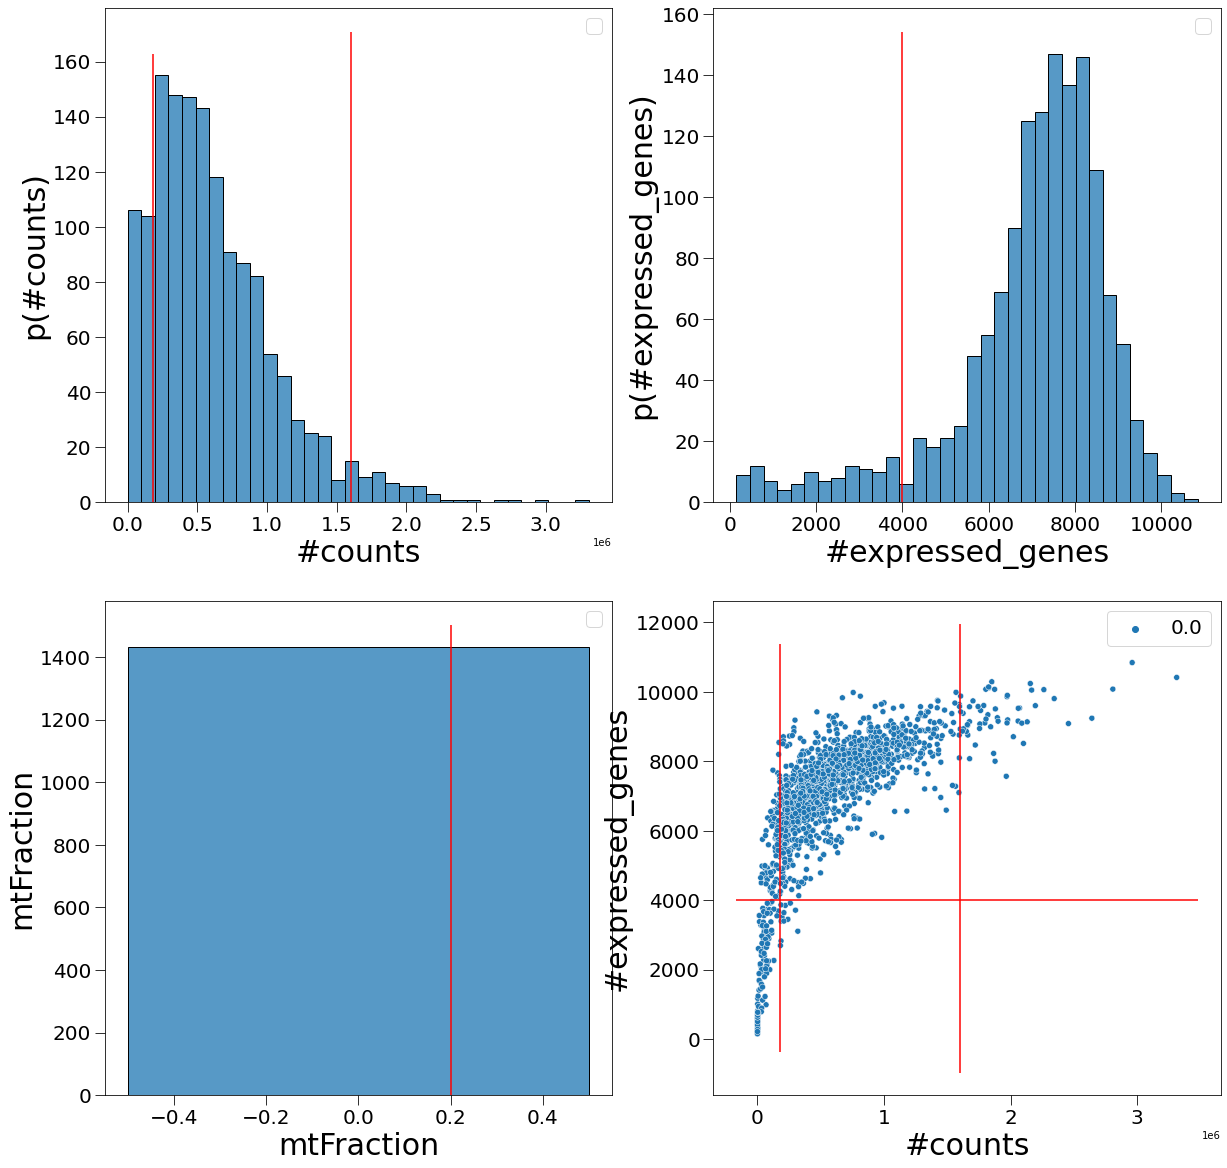

In [5]:
fig,ax = plt.subplots(2,2,figsize=[20,20])

sns.histplot(data=adata.obs,x="#counts",ax=ax[0,0])
sctplot.plot_base(ax[0,0],labels=["#counts","p(#counts)"])
sctplot.vline(ax[0,0],COUNTS_MIN,color="r")
sctplot.vline(ax[0,0],COUNTS_MAX,color="r")

sns.histplot(data=adata.obs,x="#expressed_genes",ax=ax[0,1])
sctplot.plot_base(ax[0,1],labels=["#expressed_genes","p(#expressed_genes)"])
sctplot.vline(ax[0,1],GENES_MIN,color="r")

sns.histplot(data=adata.obs,x="mtFraction",ax=ax[1,0])
sctplot.plot_base(ax[1,0],labels=["mtFraction","mtFraction"])
sctplot.vline(ax[1,0],MTFRACTION_MAX,color="r")

sns.scatterplot(data=adata.obs,y="#expressed_genes",x="#counts",hue="mtFraction",ax=ax[1,1])
sctplot.plot_base(ax[1,1],labels=["#counts","#expressed_genes"])
sctplot.hline(ax[1,1],GENES_MIN,color="r")
sctplot.vline(ax[1,1],COUNTS_MIN,color="r")
sctplot.vline(ax[1,1],COUNTS_MAX,color="r")

fig.show()

In [6]:
retained, summary = scttools.filter_cells(adata,
            ("#counts",COUNTS_MIN,COUNTS_MAX),
            ("#expressed_genes",GENES_MIN,np.Inf),
            ("mtFraction",0,MTFRACTION_MAX)) #originally we kept empty as well

summary

/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


,Object,#below,%below,#above,%above,Total_removed,%Total_removed
0,obs.#counts,186,0.129888,56,0.039106,242,0.168994
1,obs.#expressed_genes,112,0.078212,0,0.0,112,0.078212
2,obs.mtFraction,0,0.0,0,0.0,0,0.0
3,TOTAL_,0,0,0,0,254,0.177374


In [7]:
adata = adata[retained,:]

In [8]:
#adata.X = adata.layers["Raw"].copy()
scp.pp.normalize_total(adata,target_sum=np.mean(adata.obs["#counts"].values))
scp.pp.log1p(adata)
scp.pp.highly_variable_genes(adata)
scp.pp.pca(adata,n_comps=20,use_highly_variable=True)
scp.pp.neighbors(adata, use_rep="X_pca", metric="euclidean",knn=20)
scp.tl.umap(adata)
scp.tl.leiden(adata)

/opt/conda/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
2025-01-27 15:04:20.146308: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-01-27 15:04:20.146323: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


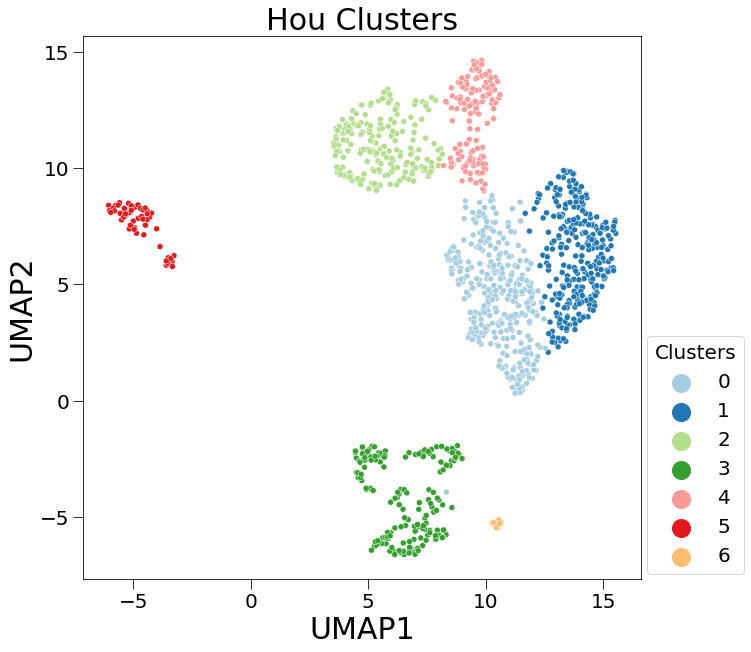

In [9]:
fig,ax = plt.subplots(figsize=[10,10])

scp.tl.leiden(adata,resolution = .2)
X = adata.obsm["X_umap"]
#hue = [i+"_"+j for i,j in adata.obs[["Stage","Sorted"]].values]
hue = adata.obs["leiden"]
unique_hues = len(hue.unique())
palette = ([i for i in sns.color_palette("Paired")] + [i for i in sns.color_palette("Set2")])[:unique_hues]
sns.scatterplot(x=X[:,0],y=X[:,1],hue=hue,palette=palette)
sctplot.plot_base(ax,labels=["UMAP1","UMAP2"],title="Hou Clusters",legend_title="Clusters",legend_size=20,legend_markerscale=3,legend_pos=(1.01,0.01))

fig.savefig("Plots/Hou_umaps.pdf",bbox_inches="tight",transparent=True)
plt.show()

... storing 'Stage' as categorical
... storing 'Type' as categorical
... storing 'Plate' as categorical


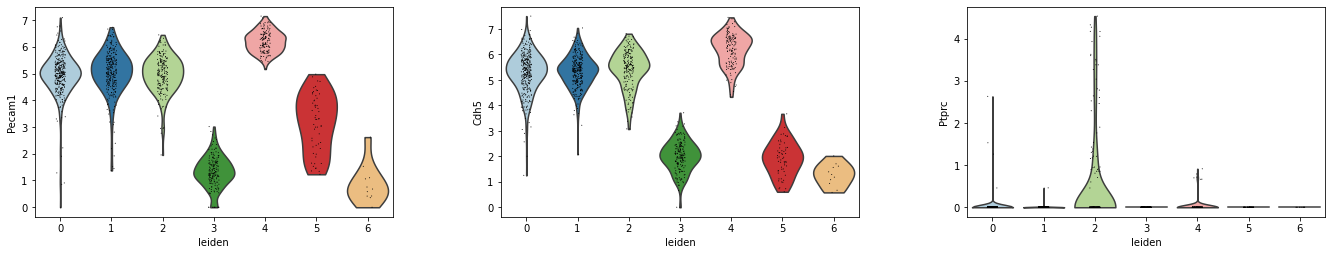

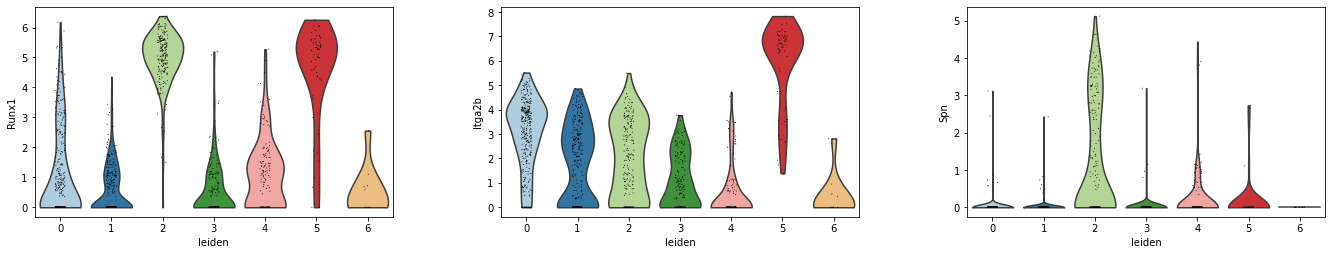

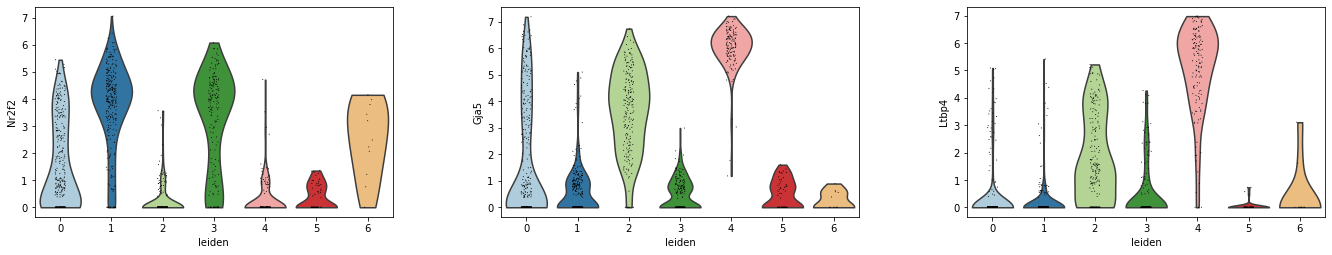

In [10]:
adata.var.index = adata.var["gene_name"].values
scp.pl.violin(adata, ["Pecam1", "Cdh5", "Ptprc"], groupby="leiden", palette=palette)
scp.pl.violin(adata, ["Runx1", "Itga2b", "Spn"], groupby="leiden", palette=palette)
scp.pl.violin(adata, ["Nr2f2", "Gja5", "Ltbp4"], groupby="leiden", palette=palette)

In [11]:
annotation = {
    0 : "vEC",
    1 : "vEC",
    2 : "HEC",
    3 : "Neg",
    4 : "early/lateAEC",
    5 : "HC",
    6 : "Neg"
}
adata.obs["annotation"] = adata.obs["leiden"].apply(lambda x : annotation[int(x)]).values

In [12]:
adata.write("./Hou.h5ad")

... storing 'annotation' as categorical
